In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("TB3MS.xls")

In [13]:
df.head()

,observation_date,TB3MS,abs_rate,relative_ir
0,1934-01-01,0.72,0.0072,-0.026785
1,1934-02-01,0.62,0.0062,-0.027785
2,1934-03-01,0.24,0.0024,-0.031585
3,1934-04-01,0.15,0.0015,-0.032485
4,1934-05-01,0.16,0.0016,-0.032385


In [7]:
df['abs_rate'] = df['TB3MS'] / 100

In [9]:
long_term_mean = df['abs_rate'].mean()
long_term_mean

0.03398494921514312

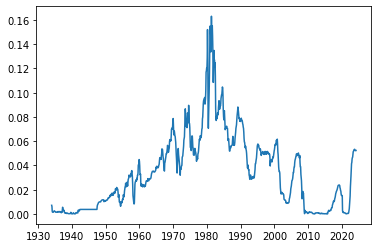

In [10]:
plt.figure(1)
plt.rc('xtick', labelsize=10)
plt.plot(np.array(df['observation_date']), np.array(df['abs_rate']))
plt.show()

In [11]:
df['relative_ir'] = df['abs_rate'] - long_term_mean

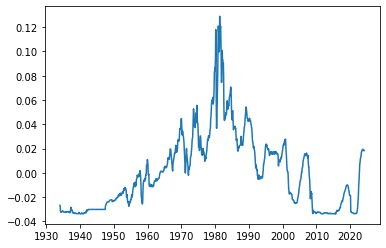

In [12]:
plt.figure(1)
plt.rc('xtick', labelsize=10)
plt.plot(np.array(df['observation_date']), np.array(df['relative_ir']))
plt.show()

In [15]:
import scipy.optimize as spop
from scipy import stats

In [14]:
df['residual_error'] = 0

In [16]:
def optimizer(drift_speed):
    d_sp = drift_speed
    
    for i in range(1, df.shape[0]):
        df.loc[i, 'residual_error'] = (df.loc[i,'relative_ir']-d_sp*df.loc[i-1,'relative_ir'])**2/(df.loc[i,'relative_ir']+long_term_mean)
        
    rss = df.loc[1, 'residual_error'].sum()
    
    return rss

In [17]:
res = spop.minimize(optimizer, 0.5, method='Nelder-Mead')

In [18]:
print(res)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0215500453910712e-10
             x: [ 1.037e+00]
           nit: 16
          nfev: 32
 final_simplex: (array([[ 1.037e+00],
                       [ 1.037e+00]]), array([ 1.022e-10,  5.342e-10]))


In [19]:
res.x

array([1.03730469])

In [22]:
discrete_drift_speed = res.x.item()

In [23]:
discrete_drift_speed

1.0373046875000012

In [33]:
df1.tail()

,observation_date,TB3MS,abs_rate,relative_ir,residual_error
1077,2023-11-01,5.27,0.0527,0.018715,0.000039
1078,2023-12-01,5.24,0.0524,0.018415,0.000019
1079,2024-01-01,5.22,0.0522,0.018215,0.000015
1080,2024-02-01,5.24,0.0524,0.018415,0.000004
1081,2024-03-01,5.24,0.0524,0.018415,0.000009


In [26]:
df1 = df[1:]

In [28]:
df1 = df1.reset_index(drop=True)

In [30]:
speed_of_reversion = np.log(1 / discrete_drift_speed)
speed_of_reversion

-0.03662570238884674

In [31]:
discrete_volatility = np.sqrt(df1['residual_error'].sum() / df1.shape[0])
discrete_volatility

0.02915787132370945

In [32]:
volatility = np.sqrt(discrete_volatility**2 * 2 * speed_of_reversion/(1-np.exp(-2*speed_of_reversion)))
volatility

0.028625567058069862

In [34]:
r0 = 0.0524 #Interst rate at March 2024

In [35]:
T = 1 #predicting for next 1 year
N = 12 # As data is monthly hence 12 months in a year

In [36]:
del_t = T/N

In [38]:
M = 50000 #Number of Simulation run

In [39]:
from matplotlib import pyplot as plt
from numpy import random as rn
%matplotlib inline

In [40]:
dz = rn.randn(M,N) #generate a matrix for random variables which are 
                   #standard normally distributed with a mean of 0 and a standard deviation of 1.0

In [41]:
dz

array([[-0.10290758, -0.72220337,  2.12904864, ...,  0.44786957,
         1.52044734,  1.55758111],
       [-0.48142092,  1.07888058,  1.33836906, ...,  0.22146035,
         2.22097783,  0.77588451],
       [-1.28941356, -0.43071745, -1.25562975, ..., -0.64382227,
        -1.148354  , -1.52043043],
       ...,
       [-0.17239614,  0.33582297, -1.22342967, ..., -1.40742544,
        -0.04310348, -0.14638877],
       [-0.84815772,  1.19414617,  0.00870105, ...,  0.73179803,
        -0.11953573,  1.53004643],
       [-0.13890848, -0.35468998,  1.41268253, ..., -1.18581066,
         0.51247054, -2.02811289]])

In [42]:
r = r0*np.ones((M,N+1)) #generate a matrix for the sample interest rates, 
                        #takes n+1 columns because, r0 will be used as first column for 1st calculation

In [43]:
r

array([[0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524],
       [0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524],
       [0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524],
       ...,
       [0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524],
       [0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524],
       [0.0524, 0.0524, 0.0524, ..., 0.0524, 0.0524, 0.0524]])

In [45]:
a = speed_of_reversion
b = long_term_mean
sigma = volatility

In [46]:
#CIR Model formula

for i in range(0, N):
    r[:,i+1] = r[:,i] + a*(b-r[:,i])*del_t + sigma*dz[:,i]*np.sqrt(del_t)*np.sqrt(r[:,i])

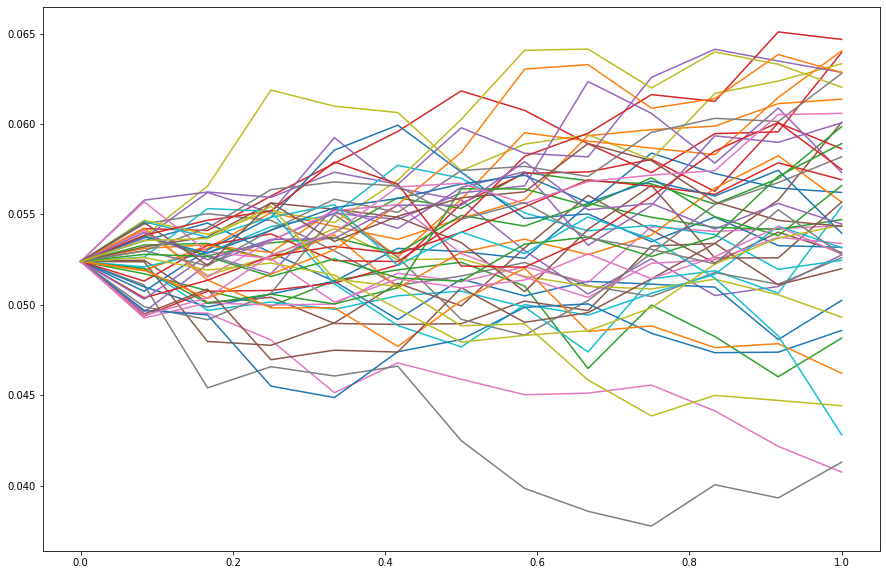

In [50]:
plt.figure(figsize=(15,10))

a = [ rn.randint(0,M) for j in range(1,50)]

for runer in a:
    plt.plot(np.arange(0,T+del_t,del_t),r[runer])

In [48]:
V = (r[:,-1])

In [49]:
print("The expected value for the interest rate is:","{:.3%}".format(np.mean(V)))
print("The standard error of sample mean is:", "{:.4%}".format(np.std(V)/np.sqrt(M)))

The expected value for the interest rate is: 5.309%
The standard error of sample mean is: 0.0030%


In [51]:
from scipy.stats import norm

In [57]:
z = norm.ppf(0.95)

In [55]:
mu = np.mean(V)
mu

0.05309031074812112

In [56]:
SE = np.std(V) / np.sqrt(M)
SE

2.979493441624396e-05

In [58]:
mu + z * SE

0.05313931905406046

In [59]:
mu - z * SE

0.05304130244218178

In [60]:
print("Upper 95% is:","{:.3%}".format(mu + z * SE))
print("Lower 95% is:", "{:.3%}".format(mu - z * SE))

Upper 95% is: 5.314%
Lower 95% is: 5.304%
